In [1]:
!pip install -q lightgbm


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib


In [3]:
# Update your dataset path accordingly
df = pd.read_csv('/kaggle/input/student-score-prediction/student_score_dataset.csv')
df.head()


,Gender,Hours_Studied,Previous_Exam_Score,Attendance,Sleep_Hours,Health_Issues,Extra_Curricular_Hours,Student_Score
0,Female,0.5,92.0,68.7,9.3,No,16.8,72.1
1,Male,7.9,41.3,76.8,3.8,Yes,4.0,63.9
2,Male,9.1,60.6,99.5,6.1,Yes,6.0,85.6
3,Female,7.2,67.8,80.8,8.1,Yes,13.9,80.2
4,Female,7.1,71.3,66.4,4.1,No,10.0,75.9


In [4]:
# Encode categorical columns
label_encoders = {}

# Only encode Gender and Health_Issues now (Internet_Access is not present)
for column in ['Gender', 'Health_Issues']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target
X = df.drop(columns=['Student_Score'])
y = df['Student_Score']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
import lightgbm as lgb

# Initialize model with fine-tuned parameters
model = lgb.LGBMRegressor(
    objective='regression',
    n_estimators=500,        # Slightly increased
    learning_rate=0.05,      # Slower learning rate
    max_depth=6,             # To avoid overfitting
    num_leaves=20,           # Control complexity
    random_state=42
)

# Train model
model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 905
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 7
[LightGBM] [Info] Start training from score 67.398806


LGBMRegressor(learning_rate=0.05, max_depth=6, n_estimators=500, num_leaves=20,
              objective='regression', random_state=42)

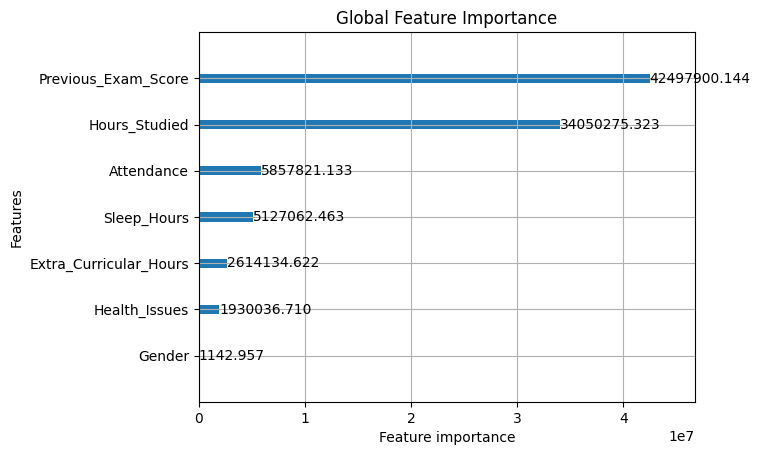

In [7]:
import matplotlib.pyplot as plt

# Global feature importance
lgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Global Feature Importance")
plt.show()


In [8]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.9904
MAE: 1.4966
MSE: 2.7428
RMSE: 1.6561


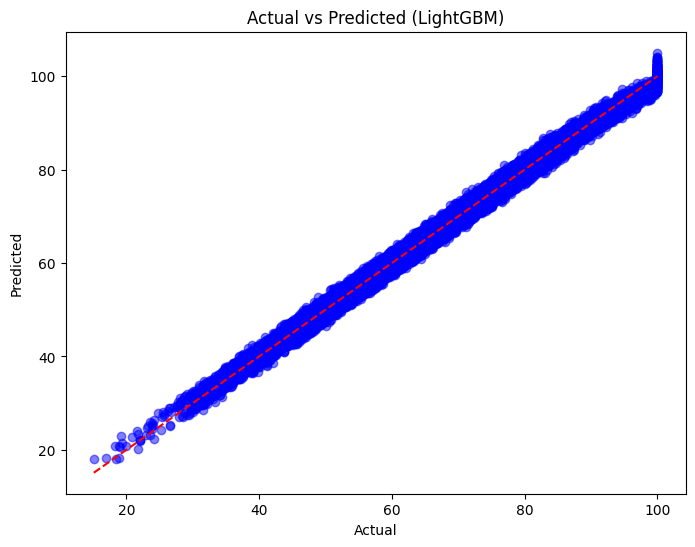

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (LightGBM)')
plt.show()


In [10]:
joblib.dump(model, 'student_score_lgbm_model.pkl')
print("LightGBM model saved successfully!")


LightGBM model saved successfully!
